<a href="https://colab.research.google.com/github/NancyBiyahut/NancyBiyahut/blob/main/trainingg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE_l= 550
IMAGE_SIZE_h= 550
BATCH_SIZE = 32
CHANELS = 3
EPOCHS = 5

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ai project/db",
    shuffle = True,
    image_size = (IMAGE_SIZE_l,IMAGE_SIZE_h) ,
    batch_size = BATCH_SIZE
)

Found 999 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Level_0', 'Level_1', 'Level_2']

In [9]:
for image_batch , label_batch in dataset.take(1):
 print(image_batch[0].shape)

(550, 550, 3)


In [10]:
len(dataset)

32

In [11]:
train_size = 0.8
len(dataset) * train_size

25.6

In [12]:
train_ds= dataset.take(25)
test_ds = dataset.skip(25)

In [13]:
val_size = 0.1
len(dataset) * val_size

3.2

In [14]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [15]:
test_ds = test_ds.skip(3)
len(test_ds)

4

In [16]:
train_ds= train_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE_l,IMAGE_SIZE_h),                
     layers.experimental.preprocessing.Rescaling(1.0/550)               
])

In [18]:
data_augumentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2)                
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE_l , IMAGE_SIZE_h , CHANELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augumentation ,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape= input_shape)



In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 550, 550, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 550, 550, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 548, 548, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 274, 274, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 272, 272, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 136, 136, 64)       0         
 2D)                                                  

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
from tensorflow.python.ops.gen_batch_ops import batch
history = model.fit(
   train_ds,
   epochs = EPOCHS ,
   batch_size = BATCH_SIZE ,
   verbose = 1,
   validation_data = val_ds
)

Epoch 1/5
25/25 [==============================] - 501s 18s/step - loss: 0.9964 - accuracy: 0.4650 - val_loss: 0.9961 - val_accuracy: 0.4583
Epoch 2/5
25/25 [==============================] - 437s 18s/step - loss: 0.9990 - accuracy: 0.4712 - val_loss: 1.0152 - val_accuracy: 0.4583
Epoch 3/5
25/25 [==============================] - 429s 17s/step - loss: 1.0017 - accuracy: 0.4588 - val_loss: 0.9373 - val_accuracy: 0.4583
Epoch 4/5
25/25 [==============================] - 424s 17s/step - loss: 1.0067 - accuracy: 0.4837 - val_loss: 0.9402 - val_accuracy: 0.4583
Epoch 5/5
25/25 [==============================] - 429s 17s/step - loss: 0.9949 - accuracy: 0.4837 - val_loss: 0.9610 - val_accuracy: 0.4583


In [24]:
score = model.evaluate(test_ds)

4/4 [==============================] - 19s 3s/step - loss: 0.9741 - accuracy: 0.4660


In [25]:
score

[0.9741225242614746, 0.4660194218158722]

In [26]:
history.params

{'epochs': 5, 'steps': 25, 'verbose': 1}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.show()

first image to predict
actual label: Level_1
predicted label: Level_1


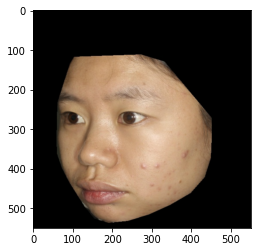

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

running a prediction


first image to predict
actual label: Level_1
predicted label: Level_1


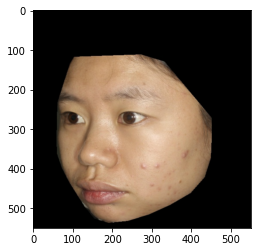

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


Now run inference on few sample images

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

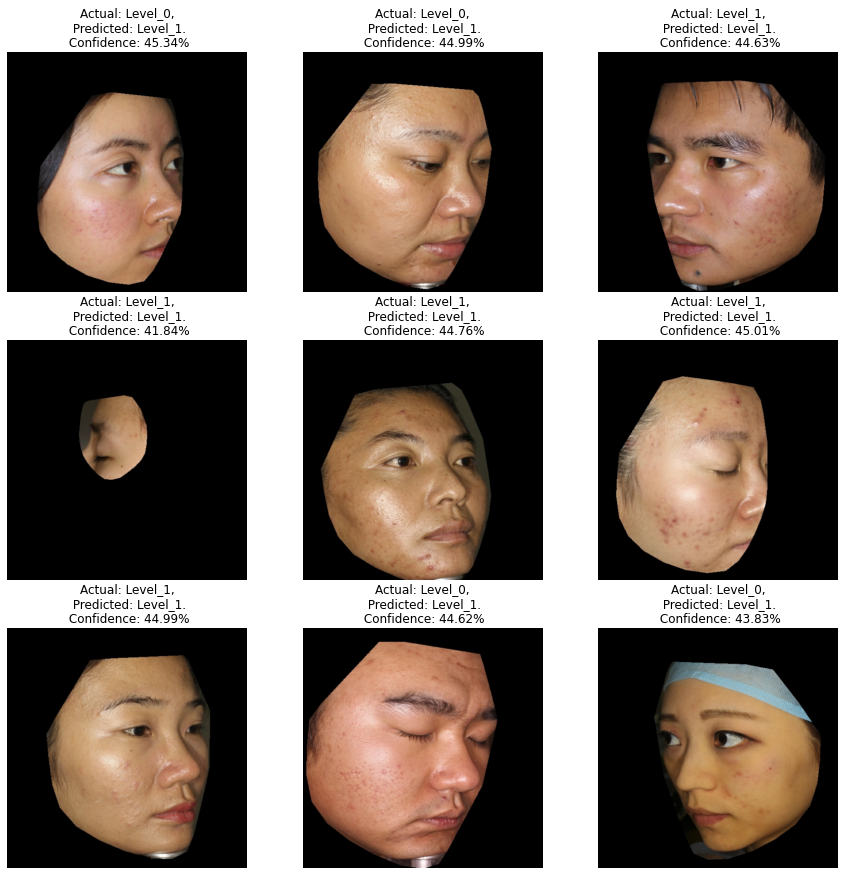

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [37]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2/assets


In [38]:
model.save("../skin.h5")